# <font color='#98FB98'>**Machine Learning Project: Iris Classification**</font> 

As a good practice for what we have learned in this course we will review an actual simple `Machine Learning` case. 

This is a very basic application of Machine Learning for complete Beginners using the `Iris` Dataset.  
You can learn how to implement a machine learning to a given dataset by following this notebook.

## <font color='#FFA500'>**Iris Dataset**</font> 

The Iris dataset is a classic dataset in the field of machine learning and statistics, often used for demonstrating various data analysis, machine learning, and statistical techniques.

The dataset contains 150 samples of iris flowers, divided into three different species: 
- `Iris setosa`
- `Iris versicolor`
- `Iris virginica`  

Each species has 50 samples (<font color='#FF69B4'>**balanced dataset?**</font>).

For each sample, the dataset includes four features:
- Sepal length (in cm)
- Sepal width (in cm)
- Petal length (in cm)
- Petal width (in cm)

These measurements are the key attributes used to characterize and differentiate the flowers.



<div style='text-align: center'>
    <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png' alt='python' title='ml_example' width='900' height='400'/>
</div>

<font color='#FF69B4'>**Objective:**</font> The primary objective when using the Iris dataset is typically to classify the iris flowers into one of the three species based on the given features. It's a `multi-class classification` problem, as there are `three categories` involved.

<font color='#FF69B4'>**Question:**</font> Comapre multi-class and single class problems. Give an example for each group. 

> The Iris dataset is widely used as a simple yet illustrative example to demonstrate the mechanics of various machine learning algorithms, especially for classification tasks.  
> It is suitable for demonstrating algorithms like `logistic regression`, `k-nearest neighbors`, `support vector machines`, and many more.

## <font color='#FFA500'>**Importing Required Library/Packages**</font> 

First, we need to import all the required libraries and packages we need to use for this analysis: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Here's a brief explanation of each library/package mentioned: 

- **`numpy (np)`**: NumPy is a fundamental package for scientific computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. It's widely used for numerical computations.  
It's not a class but a module that provides classes, functions, and constants.

- **`pandas (pd)`**: Pandas is a library offering data structures and data analysis tools for Python. It's known for its `DataFrame` object, which is a powerful tool for data manipulation and analysis. It's commonly used for data cleaning, transformation, and analysis. Like NumPy, it's a module, not a class.

- **`matplotlib.pyplot (plt)`**: Matplotlib is a plotting library for Python and its numerical mathematics extension NumPy. pyplot is a module in Matplotlib that provides a MATLAB-like interface for making plots and graphs. It's used for data visualization. pyplot is a module, not a class.

- **`seaborn (sns)`**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It's used for making more advanced types of plots and for its beautiful default styles. Seaborn itself is a module, not a class.

- **`sklearn`** : Scikit-Learn, often referred to as sklearn, is an open-source machine learning library for the Python programming language. It's built on NumPy, SciPy, and matplotlib and provides a range of supervised and unsupervised learning algorithms via a consistent interface.  
Importing the entire sklearn library is generally avoided for several practical and technical reasons, including memory usage, namespace clutter, readability, and performance. 

<font color='#FF69B4'>**Question:**</font> What is the difference between library, package, module or class? 


- A **`library`** is a collection of modules that provide a set of functionalities and are designed to be used by other programs. It may include a group of related packages and modules that provide a set of related functions and classes. You can think of a library as a collection of resources (modules and packages) that you can use to implement functionality in your program without having to write the code from scratch.

- A **`package`** in Python is a way of organizing related modules into a single directory hierarchy. A package can contain subpackages and modules.

- A **`module`** is a single file (or script) in Python, whereas a package is a collection of modules in a directory, and a library could be a collection of packages/modules that are related and distributed together.

<div style='text-align: center'>
    <img src='Category.png' alt='python' title='ml_example' width='600' height='400'/>
</div>

## <font color='#FFA500'>**Data Loading and Preprocessing**</font> 

In [2]:
# read dataset from URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)

Here, we load iris dataset directly from a URL into a pandas DataFrame in Python, specifically using the Iris dataset from the UCI (University of California, Irvine) Machine Learning Repository.

- `url` is a string variable that stores the web address of the Iris dataset. 
- `cls` is a list of strings that represent the names of the columns for the dataset.
- `read_csv` function from pandas (imported as pd) to read the dataset from the provided URL.

In [5]:
# Displaying the first ten rows of the DataFrame
dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Displaying the last five rows of the DataFrame
dataset.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# If we want to load the Iris dataset directly to the notebook
iris_df = pd.read_excel('iris.xlsx')

In [6]:
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's quickly look into preliminary statistics of dataset:

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


The `describe()` method in Pandas is a very useful function to perform a quick statistical summary on the numerical columns of a DataFrame.  
When you apply `.describe()` to a DataFrame and then transpose the result with `.T`, you get a transposed summary where each statistical metric becomes a row instead of a column.

In [8]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Applying info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> `dataset.info()` is a method that provides a concise summary of the DataFrame. This includes the number of non-null entries in each column, the column data type, and the memory usage of the DataFrame.  
> It's particularly useful for identifying columns with missing values and understanding the data types of each column, which is essential for preprocessing and model selection.

In [10]:
# Applying Shape
dataset.shape

(150, 5)

> `dataset.shape` is an attribute (not a method), so it doesn't require parentheses. It returns a tuple representing the dimensionality of the DataFrame, showing the number of rows and columns (in that order).  
> This is useful to quickly see how many instances (rows, records, observations) and features (columns, fields, variables, attributes) the dataset contains, helping you gauge the dataset's size and complexity.

<font color='#FF69B4'>**Question:**</font> What is the difference between attribute, method and function? 

We can also write a code snippet to have NullCount for each Column in a dataframe format. 

In [11]:
#Counts of null values 
na_df=pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['ColName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,ColName,NullCount


In [12]:
iris_df = pd.read_excel('iris.xlsx')
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#Counts of null values 
na_df=pd.DataFrame(iris_df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['Column_Name', 'NullCount']
na_df[(na_df['NullCount']>0)]

,Column_Name,NullCount
0,petal-length,12
1,Class,7
2,sepal-length,6
3,sepal-width,3
4,petal-width,1


### Pairplot of Features

Here, we use `Seaborn (sns)`, a Python data visualization library, to create a pair plot of the dataset DataFrame.

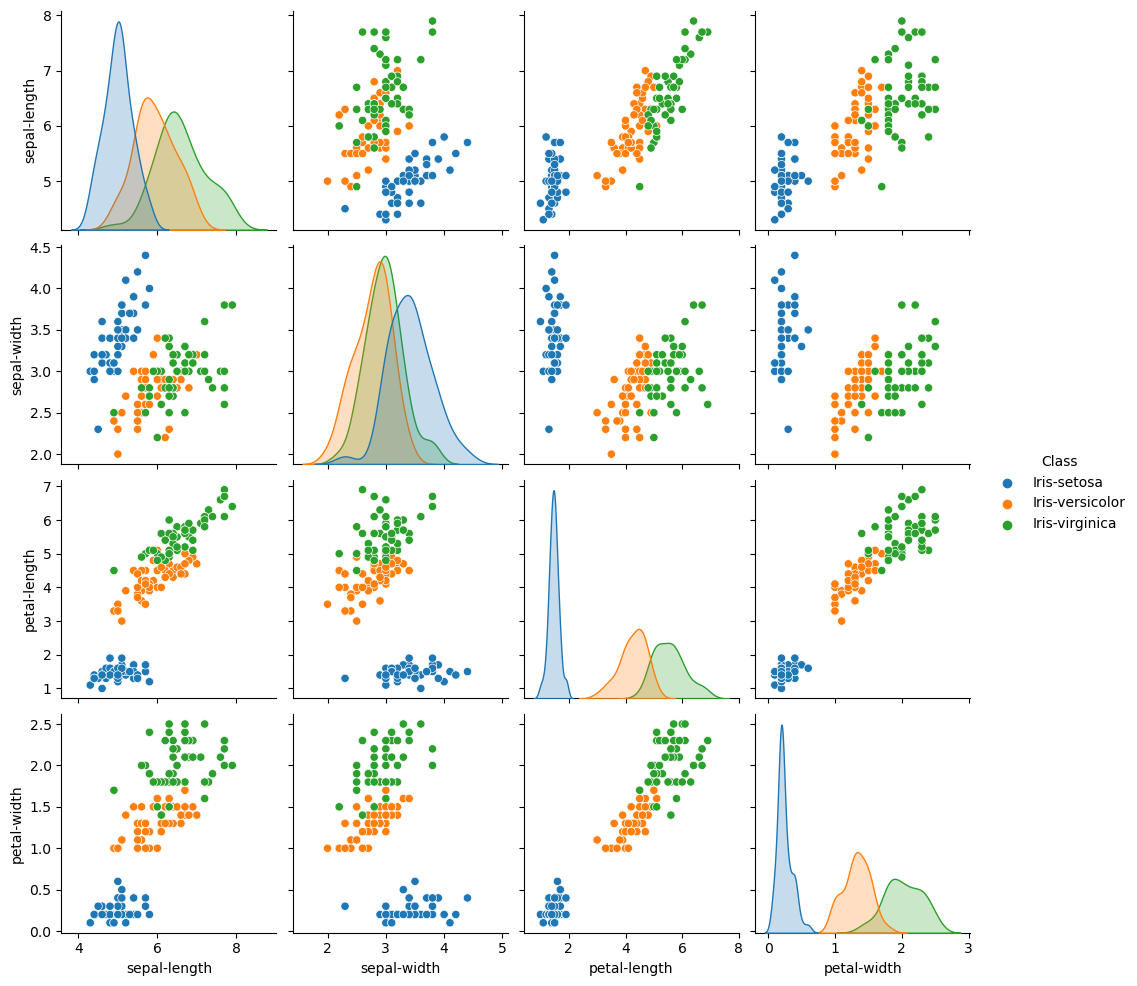

In [14]:
sns.pairplot(dataset, hue='Class')
plt.show()

After you run this code, you will get a grid of scatter plots showing the relationships between all pairs of features in the dataset, with the data points colored based on their 'Class'. This visualization is very helpful for exploring how the features correlate with each other and with the target class, which can provide insights into which features are most informative for the classification task.

/var/folders/_s/hdxt2bf977g38xtj5cxkpwfw0000gn/T/ipykernel_27458/776426883.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


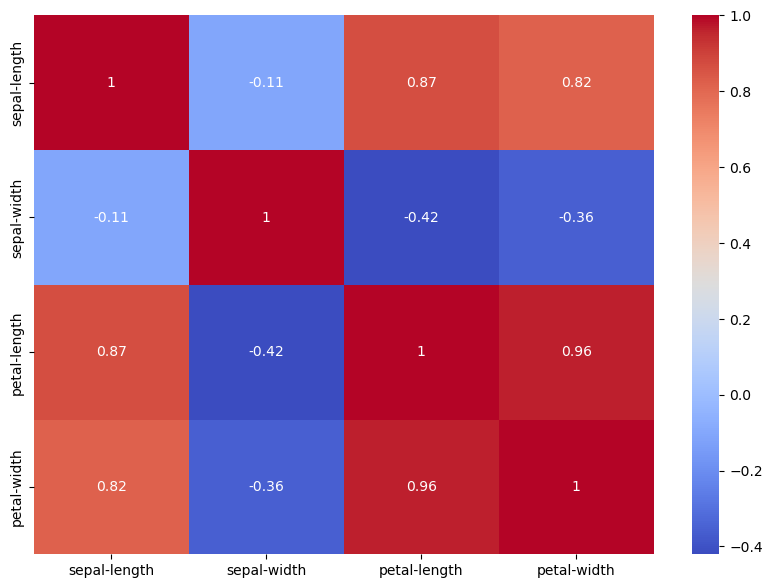

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

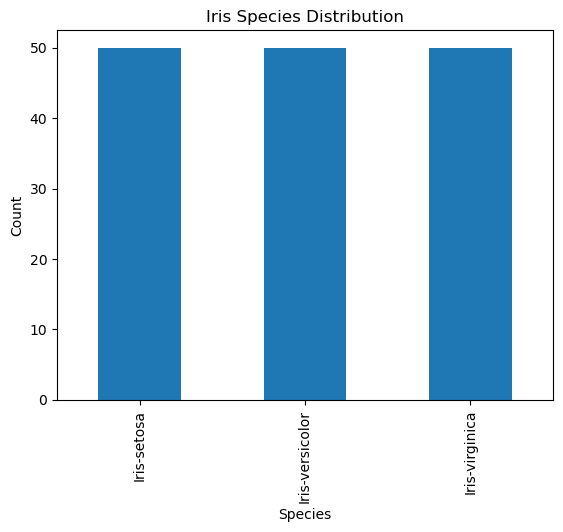

In [16]:
dataset['Class'].value_counts().plot(kind='bar', title='Iris Species Distribution', xlabel='Species', ylabel='Count')
plt.show()

## <font color='#FFA500'>**Splitting Train and Test**</font> 

Here, we will set the first four columns of the dataset as features and the last column (fifth column) as the target. 

Then we split the features and target variables into training and testing `test_size=0.2` indicates that 20% of the data will be used for testing, while the remaining 80% will be used for training. 

In [17]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

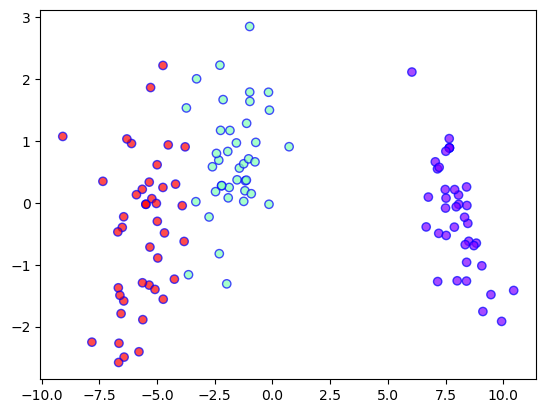

In [18]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')

## <font color='#FFA500'>**Classification Models**</font> 

- **`Logistic Regression`**: A linear model for classification that estimates probabilities using a logistic/sigmoid function.

- **`Decision Tree`**: A flowchart-like tree structure where each internal node represents a feature decision point, and each leaf node represents a class label.

- **`Random Forest`**: An ensemble of decision trees, typically trained with the "bagging" method to increase the overall model's accuracy.

- **`k-Nearest Neighbors (k-NN)`**: A non-parametric method that classifies data points based on the majority label of their k nearest neighbors in the feature space.

- **`Support Vector Machine (SVM)`**: A classifier that finds the hyperplane that maximizes the margin between two classes.

Feature sepal-length: 0.10
Feature sepal-width: 0.01
Feature petal-length: 0.44
Feature petal-width: 0.44


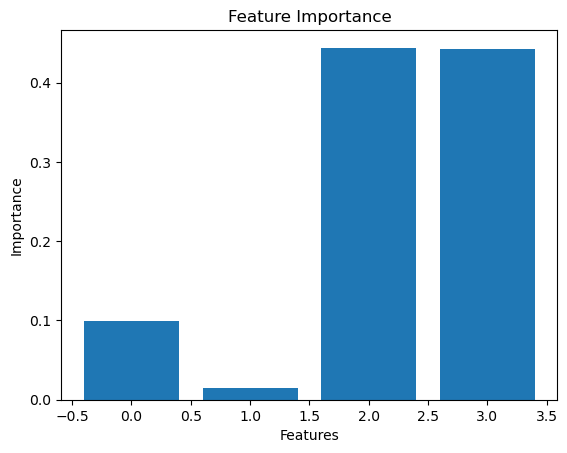

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



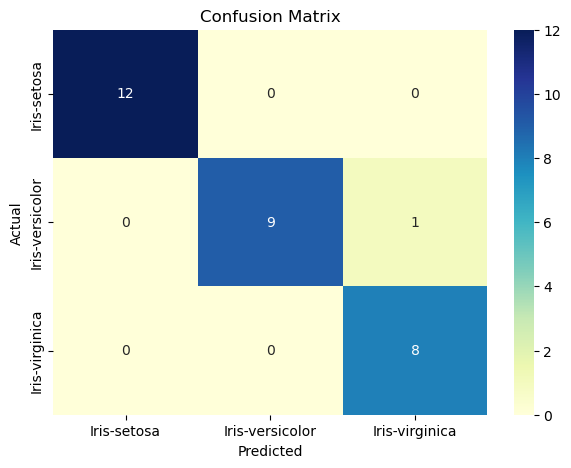

In [23]:
# [2] Feature Importance after training Random Forest Classifier

# Train a Random Forest Classifier without LDA for feature importance
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_
for i, j in enumerate(importance):
    print(f"Feature {cls[i]}: {j:.2f}")

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# [3] Additional Metrics after Classification
# Making predictions
y_pred = rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(conf_m, annot=True, cmap="YlGnBu", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Classifier evaluation function
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_m = confusion_matrix(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred, target_names=le.classes_)
    return accuracy, conf_m, class_rep

In [25]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(max_depth=2, random_state=0),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear')
}

for name, clf in classifiers.items():
    print(f"------- {name} -------")
    accuracy, conf_m, class_rep = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_m)
    print("Classification Report:")
    print(class_rep)
    print("\n")

------- Logistic Regression -------
Accuracy: 0.97
Confusion Matrix:
[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



------- Decision Tree -------
Accuracy: 0.97
Confusion Matrix:
[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
